# Count how many fingers are being held up
### via a convolutional neural network 

## Set up

In [1]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf
import numpy as np
import itertools
import keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'Data/train'
validation_path = 'Data/validation'
test_path = 'Data/test'

TARGET_SIZE = (300, 300)
BATCH_SIZE = 32
CLASSES = ['NONE','ONE','TWO','THREE','FOUR','FIVE']

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


## Functions

###### prints and plots confusion matrix


In [3]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes) + 1)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.tight_layout()
    plt.yticks(tick_marks, classes)
    plt.tight_layout()

    print(cm)
    thresh = cm.max() // 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


###### plots images with labels

In [4]:
# plots images with labels
def plot_data(train):
    for X, y in train:

        plt.figure(figsize=(16, 16))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.axis('off')
            plt.title('Label: %d' % np.argmax(y[i]))
            img = np.uint8(255 * X[i, :, :, 0])
            plt.imshow(img[:,:,::-1])
        break


## Preprocess

● Train set - 9088 images belonging to 6 classe.

● Validation set - 3601 images belonging to 6 classe.


###### Data augmentation

In [5]:
train_data_augmentation = ImageDataGenerator(#rescale=1./255,
                                       rotation_range=10.,
                                       width_shift_range=0.1,
                                       brightness_range=[0.2, 1.5],
                                       shear_range=0.1,
                                       zoom_range=0.2,
                                       fill_mode='nearest',
                                       horizontal_flip=True)

In [6]:
test_data_augmentation = ImageDataGenerator(rescale=1./255)


######  Flow from directory

In [7]:
train = train_data_augmentation.flow_from_directory(train_path,
                                                    target_size=TARGET_SIZE,
                                                    color_mode='grayscale',
                                                    batch_size=BATCH_SIZE,
                                                    classes=CLASSES,
                                                    class_mode='categorical')

Found 9088 images belonging to 6 classes.


In [8]:
validation = test_data_augmentation.flow_from_directory(validation_path,
                                                    target_size=TARGET_SIZE,
                                                    color_mode='grayscale',
                                                    batch_size=BATCH_SIZE,
                                                    classes=CLASSES,
                                                    class_mode='categorical')

Found 3601 images belonging to 6 classes.


 ###### Make sure our data are labeled correctly 
 0. None
 1. One
 2. Two
 3. Three
 4. Four
 5. Five

IndexError: too many indices for array

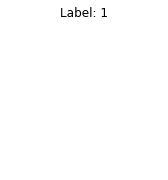

In [9]:
plot_data(train)

## Convolutional Neural Network Architecture


In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(300, 300, 1))) # input layer
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax')) 
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
______________________

###### configures the model for training

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [12]:
callback_list = [
                EarlyStopping(monitor='val_loss', patience=5),
                ModelCheckpoint(filepath='Weight/finger_model_notebook.h5', monitor='val_loss', save_best_only=True),
                ]


## Training

In [13]:
history = model.fit_generator(train,
                    steps_per_epoch=train.samples // BATCH_SIZE,
                    epochs=70,
                    validation_data=validation,
                    validation_steps=validation.samples // BATCH_SIZE,
                    callbacks=callback_list,
                    verbose=2
                    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/70
 - 1381s - loss: 0.9805 - acc: 0.6120 - val_loss: 0.2493 - val_acc: 0.9152
Epoch 2/70
 - 1345s - loss: 0.2911 - acc: 0.9004 - val_loss: 0.2038 - val_acc: 0.9434
Epoch 3/70
 - 1332s - loss: 0.1745 - acc: 0.9401 - val_loss: 0.0802 - val_acc: 0.9781
Epoch 4/70
 - 1330s - loss: 0.1342 - acc: 0.9563 - val_loss: 0.0493 - val_acc: 0.9882
Epoch 5/70
 - 1330s - loss: 0.1062 - acc: 0.9646 - val_loss: 0.0447 - val_acc: 0.9910
Epoch 6/70
 - 1314s - loss: 0.0846 - acc: 0.9700 - val_loss: 0.0287 - val_acc: 0.9927
Epoch 7/70
 - 1319s - loss: 0.0842 - acc: 0.9727 - val_loss: 0.0320 - val_acc: 0.9913
Epoch 8/70
 - 1348s - loss: 0.0704 - acc: 0.9744 - val_loss: 0.0264 - val_acc: 0.9950
Epoch 9/70
 - 1303s - loss: 0.0741 - acc: 0.9741 - val_loss: 0.0849 - val_acc: 0.9711
Epoch 10/70
 - 1294s - loss: 0.0517 - acc: 0.9834 - val_loss: 0.0297 - val_acc: 0.9958
Epoch 11/70
 - 1290s - loss: 0.0511 - acc: 0.

## Performance and Analysis


Text(0.5, 0, 'number of epochs')

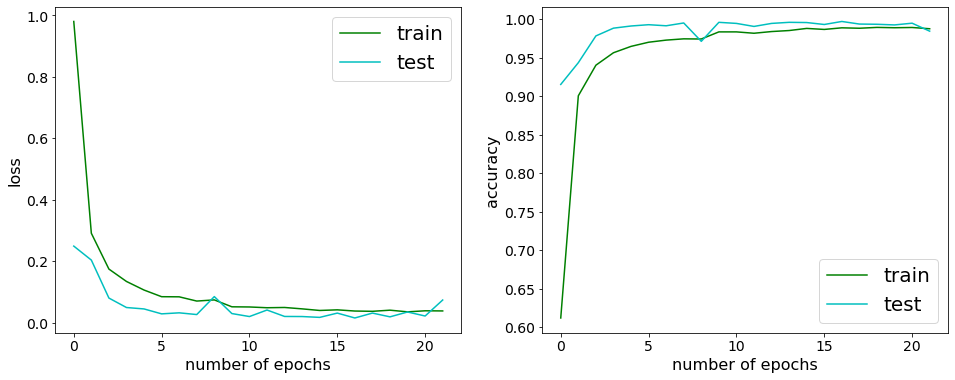

In [14]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
nepochs = len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'c-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.subplot(1, 2, 2)
plt.plot(range(nepochs), history.history['acc'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_acc'], 'c-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('number of epochs')

###### Data augmentation and flow from directory for test set

In [15]:
test_data_augmentation = ImageDataGenerator(rescale=1./255)
test = test_data_augmentation.flow_from_directory(
                                                    test_path,
                                                    target_size=TARGET_SIZE,
                                                    color_mode='grayscale',
                                                    batch_size=BATCH_SIZE,
                                                    classes=CLASSES,
                                                    class_mode='categorical',
                                                    shuffle=False
                                                    )

Found 31 images belonging to 6 classes.


###### Testing accuracy


In [16]:
X_test, y_test = [], []
for i, (X, y) in enumerate(test):
    X_test.append(X)
    y_test.append(y)
    i += 1
    if (i == 4): break
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)
y_test = np.int32([np.argmax(r) for r in y_test])
y_pred = np.int32([np.argmax(r) for r in model.predict(X_test)])
match = (y_test == y_pred)
print('Testing Accuracy = %.2f%%' % (np.sum(match)*100/match.shape[0]))

Testing Accuracy = 100.00%


###### Confusion matrix

[[20  0  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0  0 20  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 24]]


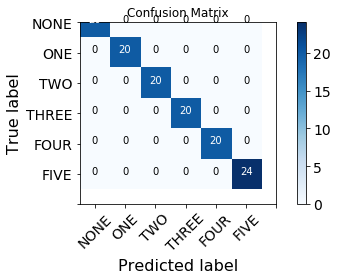

In [17]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, CLASSES, title='Confusion Matrix')

## Pre-process frame


In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams
import cv2


###### convert frame to  binary

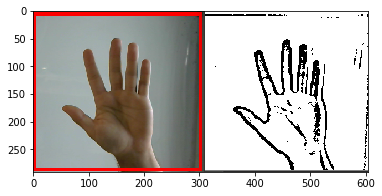

In [2]:
binary_img = cv2.imread('finger_pre.PNG')
plt.imshow(binary_img[:,:,::-1])